In [10]:
import numpy as np
from sklearn import datasets
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./mnist/data/", one_hot=True)

mnist = input_data.read_data_sets("MNIST_data", one_hot=False)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
#Train data 
X_train = mnist_data.train.images
Y_train = mnist_data.train.labels

#Test Data 
X_test = mnist_data.test.images
Y_test= mnist_data.test.labels

#Test Images
test_images = mnist.test.images[:10]

## AutoEncoder For K=10

Initialize...

 Epoch: 0 	 Average Train Error: 0.068536871985998

 Test Error 0.06786888

 Epoch: 2 	 Average Train Error: 0.055414188260328956

 Test Error 0.055612516

 Epoch: 4 	 Average Train Error: 0.048513255635043606

 Test Error 0.0479975

 Epoch: 6 	 Average Train Error: 0.04452820692677051

 Test Error 0.043406002

 Epoch: 8 	 Average Train Error: 0.040222403171355836

 Test Error 0.039701782
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


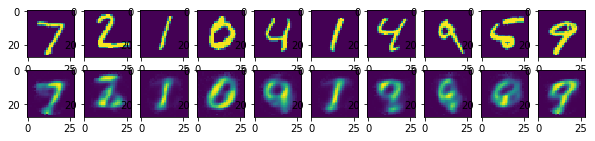

[7 2 1 0 4 1 4 9 5 9]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.8197818181818182
The testing accuracy is  0.4889
The pairwises distance for original dataset are [[0.         0.7081624  0.7862208  ... 0.5078811  0.61595017 0.7538086 ]
 [0.7081624  0.         0.61675996 ... 0.46301436 0.6475096  0.62632674]
 [0.7862208  0.61675996 0.         ... 0.68059313 0.61338687 0.55595946]
 ...
 [0.5078811  0.46301436 0.68059313 ... 0.         0.5214926  0.54819345]
 [0.61595017 0.6475096  0.61338687 ... 0.5214926  0.         0.44414687]
 [0.7538086  0.62632674 0.55595946 ... 0.54819345 0.44414687 0.        ]]
The pairwises distance for original dataset are [[0.         0.4517557  0.35365254 ... 0.28871858 0.32098407 0.4828334 ]
 [0.4517557  0.         0.30169028 ... 0.28186446 0.3549778  0.30843222]
 [0.35365254 0.30169028 0.         ... 0.38644052 0.10103583 0.1413582 ]
 ...
 [0.28871858 0.28186446 0.38644052 ... 0.         0.48814762 0.28781694]
 [0.3

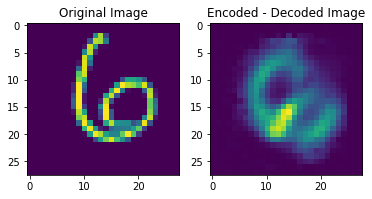

In [11]:
inputs = 784
hidden_layer = 10
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)


pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

## AutoEncoder For MNIST Data with K=20

Initialize...

 Epoch: 0 	 Average Train Error: 0.05845582063193433

 Test Error 0.057603218

 Epoch: 2 	 Average Train Error: 0.050792184585588984

 Test Error 0.048910428

 Epoch: 4 	 Average Train Error: 0.044094983604736626

 Test Error 0.04321761

 Epoch: 6 	 Average Train Error: 0.03793640591902658

 Test Error 0.038137667

 Epoch: 8 	 Average Train Error: 0.03513284068321809

 Test Error 0.034415666
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


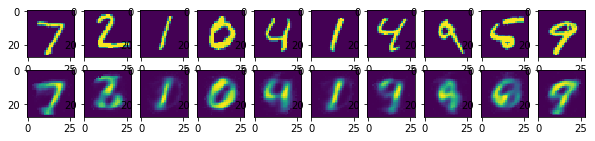

[7 2 1 0 4 1 4 9 5 9]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.8638727272727272
The testing accuracy is  0.4871
The pairwises distance for original dataset are [[0.         0.7200502  0.6137016  ... 0.83165795 0.86249655 0.77479416]
 [0.7200502  0.         0.5613676  ... 0.69396985 0.67337465 0.5455118 ]
 [0.6137016  0.5613676  0.         ... 0.567378   0.49765384 0.6305782 ]
 ...
 [0.83165795 0.69396985 0.567378   ... 0.         0.48614997 0.5948682 ]
 [0.86249655 0.67337465 0.49765384 ... 0.48614997 0.         0.6735921 ]
 [0.77479416 0.5455118  0.6305782  ... 0.5948682  0.6735921  0.        ]]
The pairwises distance for original dataset are [[0.         0.5205418  0.32234526 ... 0.6367199  0.62045336 0.5638554 ]
 [0.5205418  0.         0.3431192  ... 0.4438622  0.3820014  0.22445971]
 [0.32234526 0.3431192  0.         ... 0.42971712 0.23301631 0.39858824]
 ...
 [0.6367199  0.4438622  0.42971712 ... 0.         0.14555001 0.3248003 ]
 [0.6

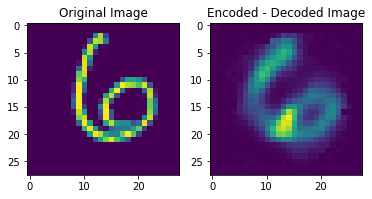

In [12]:
inputs = 784
hidden_layer = 20
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)


pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

## AutoEncoder on MNIST Data for K = 50

Initialize...

 Epoch: 0 	 Average Train Error: 0.05173940060194582

 Test Error 0.05045308

 Epoch: 2 	 Average Train Error: 0.03395269233442377

 Test Error 0.034048464

 Epoch: 4 	 Average Train Error: 0.02695673779817298

 Test Error 0.026648296

 Epoch: 6 	 Average Train Error: 0.02169213947490789

 Test Error 0.021769496

 Epoch: 8 	 Average Train Error: 0.020701477711554617

 Test Error 0.019124007
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


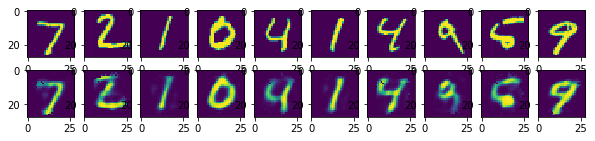

[7 2 1 0 4 1 4 9 5 9]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.9201272727272727
The testing accuracy is  0.7847
The pairwises distance for original dataset are [[0.         0.757286   0.6056441  ... 0.7201965  0.6954505  0.7761135 ]
 [0.757286   0.         0.54486537 ... 0.66596353 0.46316278 0.65864766]
 [0.6056441  0.54486537 0.         ... 0.854522   0.6062134  0.77459985]
 ...
 [0.7201965  0.66596353 0.854522   ... 0.         0.71778905 0.65046436]
 [0.6954505  0.46316278 0.6062134  ... 0.71778905 0.         0.70261616]
 [0.7761135  0.65864766 0.77459985 ... 0.65046436 0.70261616 0.        ]]
The pairwises distance for original dataset are [[0.         0.6201664  0.3891294  ... 0.6192273  0.6083922  0.6491474 ]
 [0.6201664  0.         0.36689895 ... 0.5779211  0.31511146 0.39796925]
 [0.3891294  0.36689895 0.         ... 0.73274887 0.5010592  0.511187  ]
 ...
 [0.6192273  0.5779211  0.73274887 ... 0.         0.55406535 0.5803652 ]
 [0.6

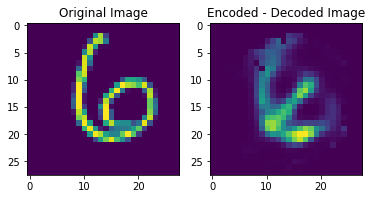

In [13]:
inputs = 784
hidden_layer = 50
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        plt.title("Original Image")
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        plt.title("Encoded-Decoded Image")
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)


pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

# MNIST Data for K=100

Initialize...

 Epoch: 0 	 Average Train Error: 0.04788673482835293

 Test Error 0.04773088

 Epoch: 2 	 Average Train Error: 0.029983743646880612

 Test Error 0.02930924

 Epoch: 4 	 Average Train Error: 0.023412997950799763

 Test Error 0.022308566

 Epoch: 6 	 Average Train Error: 0.018113232021278236

 Test Error 0.018440474

 Epoch: 8 	 Average Train Error: 0.016070333862444386

 Test Error 0.015802292
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


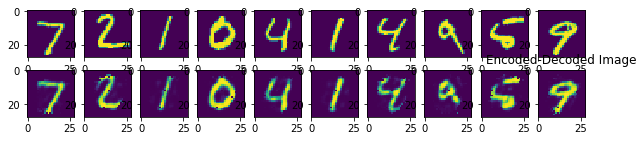

[7 2 1 0 4 1 4 9 5 9]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.9151818181818182
The testing accuracy is  0.8851
The pairwises distance for original dataset are [[0.         0.2445386  0.6352652  ... 0.48309147 0.75709486 0.47627687]
 [0.2445386  0.         0.7260548  ... 0.51296604 0.7646184  0.5354354 ]
 [0.6352652  0.7260548  0.         ... 0.65676516 0.76555187 0.46314818]
 ...
 [0.48309147 0.51296604 0.65676516 ... 0.         0.79472655 0.69761384]
 [0.75709486 0.7646184  0.76555187 ... 0.79472655 0.         0.6576515 ]
 [0.47627687 0.5354354  0.46314818 ... 0.69761384 0.6576515  0.        ]]
The pairwises distance for original dataset are [[0.         0.14273763 0.5675094  ... 0.39573085 0.69138694 0.42656928]
 [0.14273763 0.         0.60609317 ... 0.41369402 0.70023227 0.468836  ]
 [0.5675094  0.60609317 0.         ... 0.5534004  0.6712586  0.3329184 ]
 ...
 [0.39573085 0.41369402 0.5534004  ... 0.         0.68962014 0.6054619 ]
 [0.6

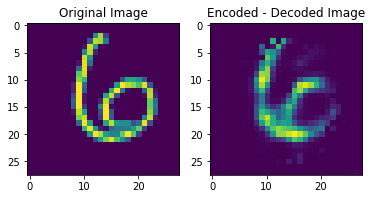

In [14]:
inputs = 784
hidden_layer = 100
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        plt.title("Original Image")
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        plt.title("Encoded-Decoded Image")
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()
    
print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)


pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

## MNIST Data for K=200

Initialize...

 Epoch: 0 	 Average Train Error: 0.051449637627229095

 Test Error 0.05094497

 Epoch: 2 	 Average Train Error: 0.03561021284258459

 Test Error 0.03583558

 Epoch: 4 	 Average Train Error: 0.03125972732232185

 Test Error 0.030853735

 Epoch: 6 	 Average Train Error: 0.025638858540332876

 Test Error 0.026471097

 Epoch: 8 	 Average Train Error: 0.025414744755835272

 Test Error 0.025082538
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


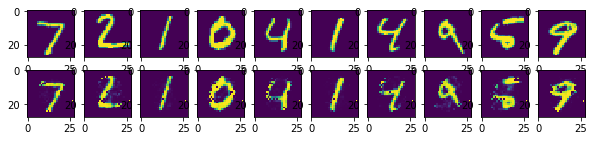

[7 2 1 0 4 1 4 9 5 9]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.9094363636363636
The testing accuracy is  0.8978
The pairwises distance for original dataset are [[0.         0.49963784 0.6060893  ... 0.30600178 0.66479963 0.46089745]
 [0.49963784 0.         0.51386577 ... 0.6811124  0.5526254  0.40455532]
 [0.6060893  0.51386577 0.         ... 0.6629115  0.8639529  0.67590046]
 ...
 [0.30600178 0.6811124  0.6629115  ... 0.         0.716016   0.6370413 ]
 [0.66479963 0.5526254  0.8639529  ... 0.716016   0.         0.6763966 ]
 [0.46089745 0.40455532 0.67590046 ... 0.6370413  0.6763966  0.        ]]
The pairwises distance for original dataset are [[0.         0.4196307  0.5115005  ... 0.3110528  0.6231066  0.4112422 ]
 [0.4196307  0.         0.39170682 ... 0.5939007  0.5663511  0.36290753]
 [0.5115005  0.39170682 0.         ... 0.59901035 0.8068968  0.6194552 ]
 ...
 [0.3110528  0.5939007  0.59901035 ... 0.         0.639048   0.5747085 ]
 [0.6

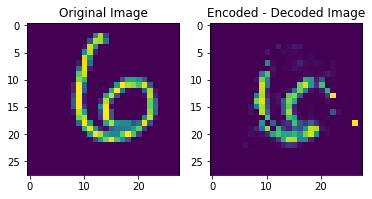

In [15]:
inputs = 784
hidden_layer = 200
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)


pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)